In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))
sys.path.append(str(Path.cwd().parent / 'label_anything'))
sys.path.append(str(Path.cwd().parent / 'label_anything' / 'data'))

In [2]:
from data.dataset import LabelAnythingDataset, VariableBatchSampler
from transforms import CustomResize, CustomNormalize
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import torch
from torchvision.transforms import Compose, ToTensor, Resize, PILToTensor
from torchvision.transforms.functional import resize
from torch.utils.data import DataLoader
import timeit
from PIL import Image
import numpy as np
import cv2
import lovely_tensors as lt
from data.dram import DramTestDataset
lt.monkey_patch()

/home/raffaele/miniconda3/envs/label-anything/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
RAW_DATA_DIR = Path.cwd().parent / "data"

In [4]:
preprocess = Compose([
    CustomResize(1024),
    PILToTensor(),
    CustomNormalize()
])

In [5]:
dataset = DramTestDataset(
    image_dir=RAW_DATA_DIR / "raw" / "DRAM_processed" / "test",
    gt_dir=RAW_DATA_DIR / "raw" / "DRAM_processed" / "labels",
    example_image_dir=RAW_DATA_DIR / "raw" / "DRAM_processed" / "test",
    example_gt_dir=RAW_DATA_DIR / "raw" / "DRAM_processed" / "labels",
    preprocess=preprocess,
    hierachy=True,
    prompt_images=[
        "realism/constant-troyon/on-the-way-to-the-market-1859", # animal
        'realism/elin-danielson-gambogi/elin-danielson-gambogi-sailing-c1890-1', # boat
        'impressionism/claude-monet/1863_212386', # bottle
        'post_impressionism/vincent-van-gogh/1888_206452', # chair
        'realism/giovanni-boldini/the-actress-rejane-and-her-dog', # person
        'realism/gustave-courbet/191719'# pottedplant
    ],
)

ANIMAL -> "realism/constant-troyon/on-the-way-to-the-market-1859"
PERSON

In [6]:
' '.join(list(DramTestDataset.TRAIN_ID2NAME.values()))

'background bird boat bottle cat chair cow dog horse person pottedplant sheep'

CAT DOG PERSON BOAT BOTTLE

boat bottle chair pottedplant

BIRD, CAT, DOG, COW, HORSE, SHEEP -> ANIMAL
PERSON -> PERSON
BOAT -> BOAT
BOTTLE -> BOTTLE
CHAIR -> CHAIR
POTTEDPLANT -> POTTEDPLANT

In [7]:
dataset.extract_prompts()

6


{<BatchKeys.IMAGES: 'images'>: tensor[1, 3, 1024, 1024] n=3145728 (12Mb) x∈[-2.036, 1.111e+03] μ=359.873 σ=297.451,
 <BatchKeys.FLAG_EXAMPLES: 'flag_examples'>: tensor[1, 6] bool x∈[False, True] μ=0.333 σ=0.516 [[True, False, False, False, True, False]],
 <BatchKeys.PROMPT_MASKS: 'prompt_masks'>: tensor[1, 6, 256, 256] n=393216 (1.5Mb) x∈[0., 1.000] μ=0.023 σ=0.149,
 <BatchKeys.FLAG_MASKS: 'flag_masks'>: tensor[1, 6] x∈[0., 1.000] μ=0.333 σ=0.516 [[1.000, 0., 0., 0., 1.000, 0.]],
 <BatchKeys.PROMPT_BBOXES: 'prompt_bboxes'>: tensor[1, 6, 1, 4] n=24 all_zeros,
 <BatchKeys.FLAG_BBOXES: 'flag_bboxes'>: tensor[1, 6, 1] u8 all_zeros [[[0], [0], [0], [0], [0], [0]]],
 <BatchKeys.PROMPT_POINTS: 'prompt_points'>: tensor[1, 6, 1, 2] n=12 all_zeros,
 <BatchKeys.FLAG_POINTS: 'flag_points'>: tensor[1, 6, 1] u8 all_zeros [[[0], [0], [0], [0], [0], [0]]],
 <BatchKeys.DIMS: 'dims'>: tensor[1, 2] i64 μ=449.000 σ=72.125 [[500, 398]]}

In [51]:
import random
random.choices(dataset.example_cat2img[6], k=5)

[49, 304, 474, 435, 391]

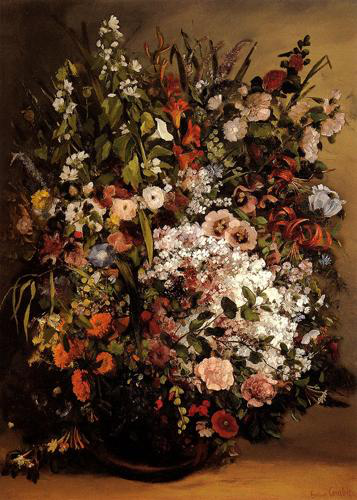

In [52]:
Image.open(f"{dataset.image_dir}/{dataset.data[49]}.jpg")

In [53]:
dataset.data[49]

'realism/gustave-courbet/191719'